# Developer tutorial: ABM examples

This tutorial describes how Starsim can be used to reproduce examples from other Python ABMs.


## `agentpy`: Virus spread

This tutorial is adapted from the following example:
https://agentpy.readthedocs.io/en/latest/agentpy_virus_spread.html

TBC

## `mesa`: Wealth model

Although Starsim is intended primarily for modeling disease, it can also be used as a general-purpose agent-based model.  This example illustrates a simple "weath model", in which each agent starts with a single unit of wealth, and on each timestep, every agent with more than zero wealth gives one unit of wealth to another agent.

This tutorial is adapted from the following example:

https://mesa.readthedocs.io/en/stable/tutorials/intro_tutorial.html

### Setting up the model



Initializing sim with 100 agents
  Running 0.0 ( 0/101) (0.01 s)  ———————————————————— 1%
  Running 10.0 (10/101) (0.01 s)  ••—————————————————— 11%
  Running 20.0 (20/101) (0.01 s)  ••••———————————————— 21%
  Running 30.0 (30/101) (0.01 s)  ••••••—————————————— 31%
  Running 40.0 (40/101) (0.01 s)  ••••••••———————————— 41%
  Running 50.0 (50/101) (0.02 s)  ••••••••••—————————— 50%
  Running 60.0 (60/101) (0.02 s)  ••••••••••••———————— 60%
  Running 70.0 (70/101) (0.02 s)  ••••••••••••••—————— 70%
  Running 80.0 (80/101) (0.03 s)  ••••••••••••••••———— 80%
  Running 90.0 (90/101) (0.03 s)  ••••••••••••••••••—— 90%
  Running 100.0 (100/101) (0.04 s)  •••••••••••••••••••• 100%



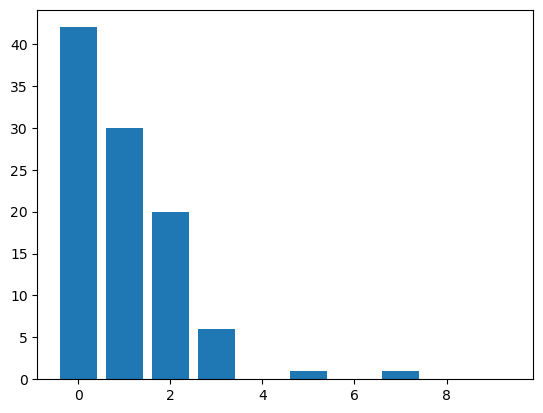

In [2]:
import numpy as np
import sciris as sc
import starsim as ss
import matplotlib.pyplot as plt


# Create the model
class MoneyModel(ss.Intervention):
    
    def init_post(self, bins=10):
        super().init_post()
        self.npts = self.sim.npts
        self.n_agents = len(sim.people)
        self.bins = np.arange(bins+1)
        self.wealth_dist = np.zeros((self.npts, len(self.bins)-1))
        return
    
    def wealth_hist(self):
        ti = self.sim.ti
        wealth = self.sim.people.wealth
        self.wealth_dist[ti,:], _ = np.histogram(wealth, bins=self.bins)
        return
        
    def apply(self, sim):
        self.wealth_hist()
        givers = (sim.people.wealth > 0).uids
        receivers = ss.uids(np.random.choice(sim.people.uid, size=len(givers)))
        sim.people.wealth[givers] -= 1
        for receive in receivers: # In a loop due to repeated indices; could also use np.add.at()
            sim.people.wealth[receive] += 1
        return
    
    def plot(self):
        plt.bar(self.bins[:-1], self.wealth_dist[-1,:])
        plt.show()
        return
    
    def plot3d(self):
        sc.bar3d(self.wealth_dist)
        return
    

# Create the custom people
n_agents = 100
wealth = ss.FloatArr('wealth', default=1.0)
people = ss.People(n_agents=n_agents, extra_states=wealth)

# Create interveniton
money = MoneyModel()

pars = dict(
    start = 0,
    end = 100,
    people = people,
    interventions = money,
)

# Run and plot the model
sim = ss.Sim(pars, copy_inputs=False)
sim.run()
money.plot()